# Classification Models
The objective of this noteboook is to build and evaluate classification models to predict customer churn given information from customers of a telephone company (`data.csv`).

### Part 1: Decision Trees

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load dataset and display the first five rows
data = pd.read_csv('data.csv')
data.head()

,Account length,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Task 01 (of 14): Partition the dataset into training set and test set using the `train_test_split` method.
Use 75% of the data for training and 25% for testing and set parameter `random_state` to 0.**

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data["Churn"],test_size = 0.25, random_state = 0)

In [4]:
# Show the dimensionality of the training set and the test set
# The training set should have 2499 observations and the test set should have 834 observations
print(x_train.shape)
print(x_test.shape)

(2499, 17)
(834, 17)


**Task 02 (of 14): Standardize the training set and test set.**
_Hint:_ Compute the mean and standard deviation using only the training set to avoid introducing bias and then apply this transformation on the training set and test set.

In [5]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Task 03 (of 14): Build a decision tree classifier to classify customers as churnend/non-churned.
Use entropy as the split criterion and set parameter `random_state` to 0.**

In [6]:
classifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [7]:
# Show the structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 238,  4,  1.37790751e+00, 0.60293799, 2499, 2.499e+03)
 (  2, 199, 16,  1.47932547e+00, 0.4991475 , 2278, 2.278e+03)
 (  3, 186,  1,  1.39084876e+00, 0.37934172, 2105, 2.105e+03)
 (  4, 135,  6,  7.91448623e-01, 0.26832186, 1921, 1.921e+03)
 (  5,   6, 12, -1.40246254e+00, 0.1779243 , 1681, 1.681e+03)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  124, 1.240e+02)
 (  7,   8, 10, -1.40125614e+00, 0.18885385, 1557, 1.557e+03)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    1, 1.000e+00)
 (  9,  26,  7, -6.43222064e-01, 0.18567934, 1556, 1.556e+03)
 ( 10,  25, 13,  3.73752005e-02, 0.09482908,  411, 4.110e+02)
 ( 11,  22, 13,  1.76009070e-03, 0.16417121,  207, 2.070e+02)
 ( 12,  17,  3,  1.93759680e+00, 0.11102003,  203, 2.030e+02)
 ( 13,  16,  0, -1.88109082e+00, 0.04741446,  190, 1.900e+02)
 ( 14,  15,  5, -1.34136140e+00, 0.72192809,    5, 5.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    1, 1.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    4, 4.000e+00)
 ( -1,  

283

**Question 01 (of 06): How many nodes are in the tree? Which variable was selected to split the root node of the tree? What can you conclude from observing the structure of the tree?**

**Answer:** `283` nodes were used to form the decision tree. The root node attribute is attribute `4` ie "Total day minutes" The data has 17 attributes but the tree has 283 nodes indicating that the tree has overfit on the data. It is a very complex tree.

**Task 04 (of 14): Predict the class labels for the test set using the decision tree classifier and plot the corresponding confusion matrix.**

In [8]:
y_pred = classifier.predict(x_test_scaled)

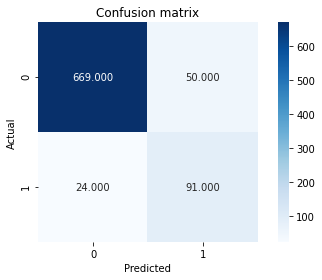

In [9]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 05 (of 14): Compute evaluation metrics for the decision tree classifier.**

In [10]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.9112709832134293, 0.08872901678657075, array([0.96536797, 0.64539007]), array([0.93045897, 0.79130435]), array([0.94759207, 0.7109375 ])]


**Question 02 (of 06): What can you conclude about the performance of the decision tree classifier?**

**Answer:** The performance of the decision tree classifier is good if we see the accuracy score only which is 91%. But the preicison, recall and F1 score indicate a bias towards one of the classes. The precision, recall and F1 score is good for one class and bad for another which clearly indicates an imbalance and the model being biased. The scores indicate a lower value for churn = 1 which is the class we are most interested in. So, the performance is not good.

### Part 2: k-Nearest Neighbors

**Task 06 (of 14): Build a k-nearest neighbors classifier to classify customers as churnend/non-churned.
Use _k=3_ as the number of nearest neighbors.**

In [11]:
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Task 07 (of 14): Predict the class labels for the test set using the k-nearest neighbors classifier and plot the corresponding confusion matrix.**

In [12]:
y_pred = classifier.predict(x_test_scaled)

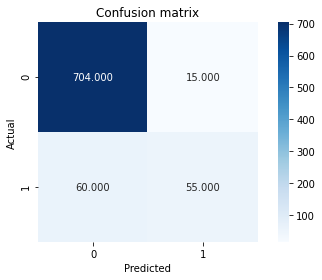

In [13]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 08 (of 14): Compute evaluation metrics for the k-nearest neighbors classifier.**

In [14]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.9100719424460432, 0.08992805755395683, array([0.92146597, 0.78571429]), array([0.97913769, 0.47826087]), array([0.94942684, 0.59459459])]


**Question 03 (of 06): What can you conclude about the performance of the k-nearest neighbors classifier? How does it compare to the previous classifier?**

**Answer:** The performance of the k-nearest neighbors classifier is good if we see the accuracy score only which is 91%. But the preicison, recall and F1 score indicate a bias towards one of the classes. The precision, recall and F1 score is good for one class and bad for another which clearly indicates an imbalance and the model being biased.

The knn model is worse than decision tree in handling the class imbalance which is evident from the recall and precision score.

### Part 3: Naive Bayes

**Task 09 (of 14): Build a Naive Bayes classifier to classify customers as churnend/non-churned.**

In [15]:
classifier = GaussianNB()  
classifier.fit(x_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Task 10 (of 14): Predict the class labels for the test set using the Naive Bayes classifier and plot the corresponding confusion matrix.**

In [16]:
y_pred = classifier.predict(x_test_scaled)

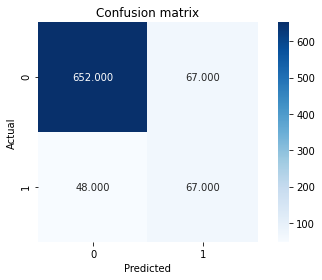

In [17]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 11 (of 14): Compute evaluation metrics for the Naive Bayes classifier.**

In [18]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8621103117505995, 0.1378896882494005, array([0.93142857, 0.5       ]), array([0.90681502, 0.5826087 ]), array([0.91895701, 0.53815261])]


**Question 04 (of 06): What can you conclude about the performance of the Naive Bayes classifier? How does it compare to the previous classifiers?**

**Answer:** The performance of the Naive Bayes classifier is decent if we see the accuracy score only which is 86%. But the precision, recall and F1 score indicate a bias towards one of the classes. The precision, recall and F1 score is good for one class and bad for another which clearly indicates an imbalance and the model being biased.

The naive bayes model is worse than decision tree and knn model in terms of the accuracy, precision and F1 score but better in terms of the recall of the minority class.

### Part 4: Support Vector Machines

**Task 12 (of 14): Build an SVM classifier to classify customers as churnend/non-churned.
Use _rbf_ (radial basis function) as the kernel function.**

In [19]:
classifier = SVC(kernel="rbf")  
classifier.fit(x_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Task 13 (of 14): Predict the class labels for the test set using the SVM classifier and plot the corresponding confusion matrix.**

In [20]:
y_pred = classifier.predict(x_test_scaled)

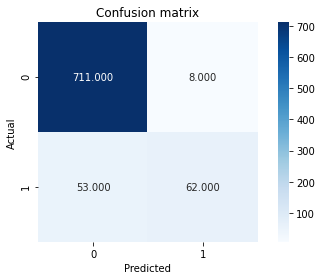

In [21]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 14 (of 14): Compute evaluation metrics for the SVM classifier.**

In [22]:
- + - - + - + - - - + + - + - - - + + +

SyntaxError: invalid syntax (<ipython-input-22-21398459c110>, line 1)

In [ ]:
y_test = [0,1,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1]
y_pred = [0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,1,1]

In [ ]:
len(y_test)

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

**Question 05 (of 06): What can you conclude about the performance of the SVM classifier? How does it compare to the previous classifiers?**

**Answer:** The performance of the SVM classifier is pretty good if we see the accuracy score only which is 92.6%. The preicison for both the classes is also pretty good. But the recall and F1 score indicate a bias towards one of the classes. The recall and F1 score is good for one class and bad for another which indicates a slight imbalance and the model being biased.

The SVM classifier is better than the Naive bayes, decision tree and Knn models in pretty much all the accuracy metrics.

**Question 06 (of 06): Which of the classifiers had the best performance?**

**Answer:** The `SVC with rbf kernel` has the best performance out of all the models. That is because of a good overall accuracy and better precision, recall and F1 score for both the classes as compared to the other models.